<a href="http://www.stfc.ac.uk/"> <img src="../img/STFCLargeColour.jpg" width="50%" align="left"/></a>
<a href="https://www.addopt.org/"><img src="../img/ADDoPT-logo-MAIN-with-text.png" width="300" height="200" align="right"/></a>



In [2]:
import sys
sys.path.append("../lib")
import models

import pandas, random, math
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

models.hideAnswers

Imported models functions


# More on Classifier Quality
[Previously](ClassifierPerformance.ipynb) we chose a cutoff to make a minimum loss classifier. Before you are given a loss function, how do you distinguish more or less powerful models?

## Receiver Operating Characteristic Curve
The ROC curve is one way, you will have come across this in the NaiveBayes session.

<IPython.core.display.Javascript object>


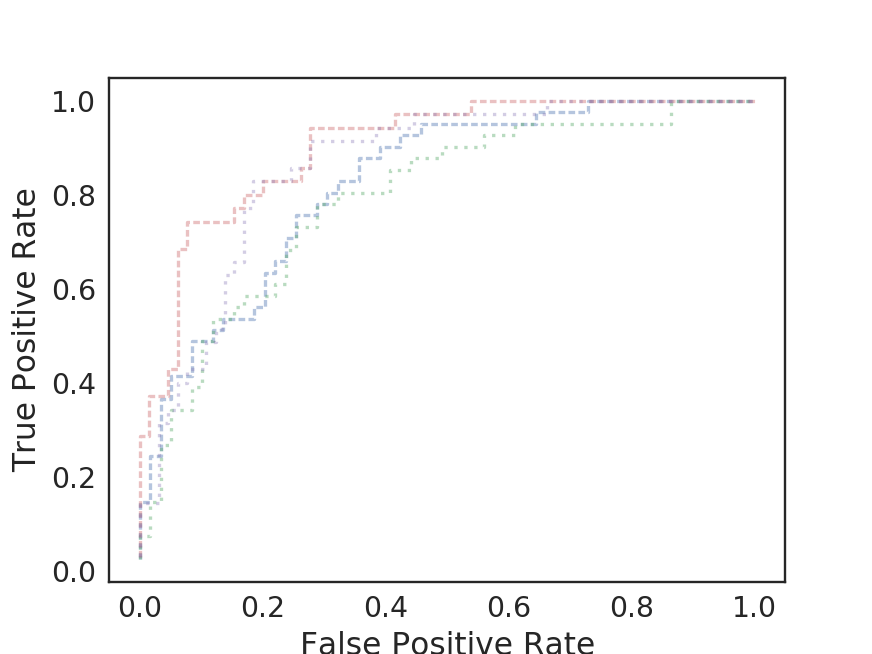

In [4]:
y1 = [random.random()< (i/100) for i in range(0,100)]
y2 = [random.random()< (i/100)**2 for i in range(0,100)]
score1 = [i/100 for i in range(0,100) ]
score2 = [ (i/100) + 0.4*random.random() for i in range(0,100) ]

fig = plt.figure()
for y in [y1, y2]:
    for score, dashes in zip([score1, score2],[[2,1],[1,2]]):
        fpr, tpr, thresholds_roc = metrics.roc_curve(y, score, pos_label=True, drop_intermediate=False)
        #zprecision, xrecall, thresholds_pr = metrics.precision_recall_curve(y, score, pos_label=True)
        plt.plot(fpr, tpr, alpha=sum(y)/100, dashes=dashes)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
fig.show()

The Area Under Curve of these graphs (AUROC) is a commonly used performance measure.

Some of these lines are close together, so AUROC does not well distinguish their performance. Here is an alternative plot.

<IPython.core.display.Javascript object>


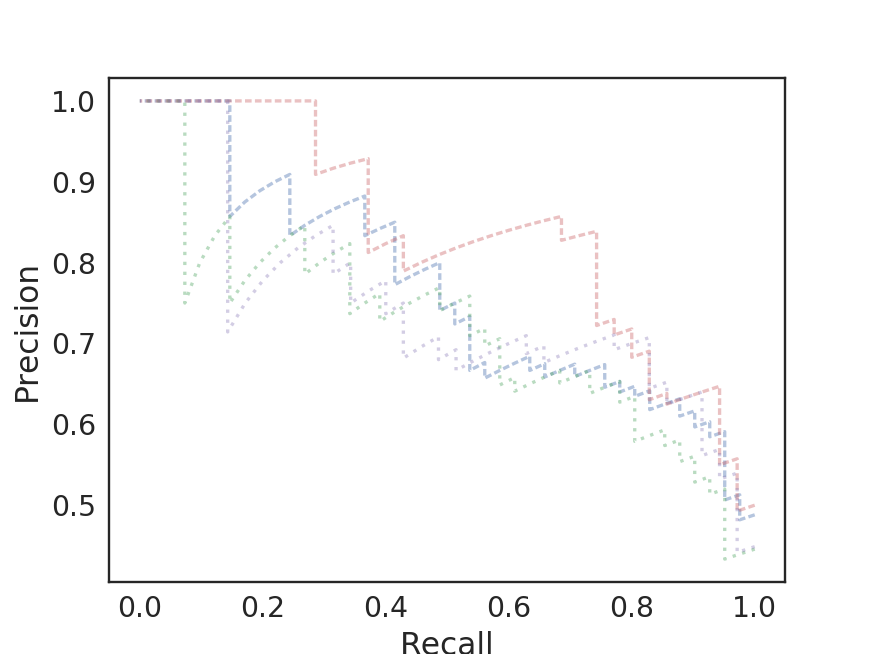

In [5]:
fig = plt.figure()
for y in [y1, y2]:
    for score, dashes in zip([score1, score2],[[2,1],[1,2]]):
        #fpr, tpr, thresholds_roc = metrics.roc_curve(y, score, pos_label=True, drop_intermediate=False)
        zprecision, xrecall, thresholds_pr = metrics.precision_recall_curve(y, score, pos_label=True)
        plt.plot(xrecall, zprecision, alpha=sum(y)/100, dashes=dashes)
plt.ylabel("Precision")
plt.xlabel("Recall")
fig.show()

Area under precision recall curve (AUPR) is a more sensitive model of performance.

Once the number $N$ of data points in the test set is fixed, then there are only three degrees of freedom. Fixing the number of actual positives and negatives reduces this to two. So we can make a 3D plot of FPR, TPR (Recall), and Precision. For all possible classifiers, there is a surface of possible values. For the actual score assignment made above, there is a line on this surface. The ROC curve is one projection of this line. The PR curve is another. So the two contain the same information.

<IPython.core.display.Javascript object>


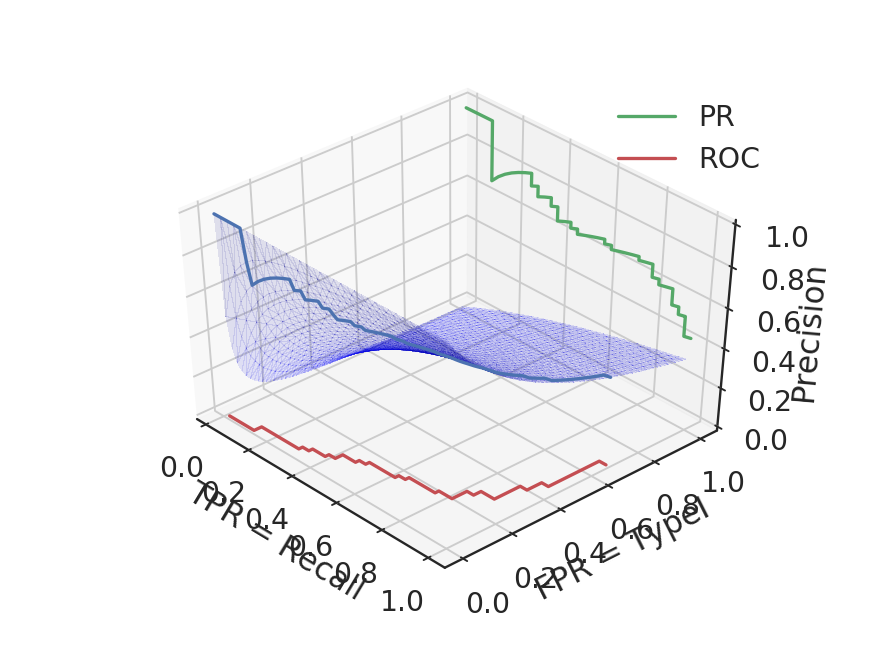

In [6]:

%matplotlib notebook
fpr, tpr, thresholds_roc = metrics.roc_curve(y2, score2, pos_label=True, drop_intermediate=False)
zprecision, xrecall, thresholds_pr = metrics.precision_recall_curve(y2, score2, pos_label=True)
# these take different decisions about where to sample the data
thresholds = sorted( list( set(thresholds_roc) & set(thresholds_pr) ) )

thresholds_roc = thresholds_roc.tolist()
thresholds_pr = thresholds_pr.tolist()

#indices = [ score.index(t) for t in thresholds ]
indices_pr =[ thresholds_pr.index(t) for t in thresholds ]
indices_roc =[ thresholds_roc.index(t) for t in thresholds ] 
assert set(xrecall[ indices_pr ]) == set(tpr[ indices_roc])    


# rates
def pp(tp, tn): # predicted positives
    return tp+an-tn
def typeI(tp, tn): # false positive rate 
    return 1 - tn/an
def recall(tp, tn):  # true positive rate 
    return tp / ap
def precision(tp, tn): # true positive, as a fraction of predicted positive
    return tp /  pp(tp, tn)
    
# possible classifiers for this problem
ap = sum(y2)
an = len(y2) - sum(y2)
x, y, z = [], [], []
for tp in range(1, ap+1):
    for tn in range(1, an+1):
        x.append( recall(tp, tn) )
        y.append( typeI(tp, tn) )
        z.append( precision(tp, tn) )
    pass

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(tpr[ indices_roc], fpr[ indices_roc], zprecision[ indices_pr ], label='')
ax.plot(xrecall[ indices_pr ], [1]*len(indices_pr), zprecision[ indices_pr ], label='PR')
ax.plot(tpr[ indices_roc], fpr[ indices_roc], [0]*len(indices_pr), label='ROC')
ax.legend()

#ax.legend()
ax.set_xlabel('TPR = Recall')
ax.set_ylabel('FPR = TypeI')
ax.set_zlabel('Precision')

ax.plot_trisurf(x, y, z, alpha=0.1, color='blue',
                linewidth=0, antialiased=False)

ax.mouse_init()
plt.show()


The points on the twisted blue surface are the set of all possible classifiers for this problem. The blue line is the trace through this set that our model takes as the cutoff is varied. The ROC curve and the PR curve are two different projections of this line. It doesn't matter much which you use - but the AU_PR varies more than AU_ROC, so it is a better performance measure.

## Interpreting the PR curve
When the cutoff is small, nearly all instances are predicted to be positive, so the recall is nearly equal to one, and the precision is nearly equal to the proportion of true positives. As the cutoff increases, more instances become predicted negatives. If the classifier is good they are true negatives, so the recall remains equal to one and the precision increases slightly. When the increase of the cutoff results in misclassification then the recall and precision both fall.

At the other end of the curve the cutoff is high, so nearly all instances are predicted to be negative, so the recall is nearly zero. If the classifier is good then the few positive predictions are accurate so the precision is one or nearly one. As the cutoff decreases, more instances become predicted positives. If these predictions are correct then the precision remains high and the recall begins to increase. When the decrease of the cutoff results in misclassification then the precision falls and the recall remains constant - these are the straight line sections of the graph.

<div class="alert alert-warning" role="alert">
<b>Exercise:</b><br>
Examine the highest-score negatives, and lowest-score positives. Do they give any clue about how our classifier could be improved?</div>


[Up]()<br>
[Back](ClassifierPerformance.ipynb) [Next](CrossEntropy.ipynb)

---------------------------------------------------
Copyright STFC 2018